<h1 style="text-align: center;">Solución Desafío Equinox AI and Data Lab </h1>


<h2 style>Secciones</h2>

A continuación, se muestra un listado con las secciones correspondientes a los diferentes desafios

[Primera Parte: Análisis y tratamiento de la información](#parte_uno)

[Segunda Parte: Machine Learning](#parte_dos)

[Tercera Parte: Capacidades en SQL](#parte_tres)

<a name="parte_uno"></a>
<h2 style>Primera Parte: Análisis y tratamiento de la información</h2>

Se importan la librerías necesarias para solucionar los diferentes problemas que se presentan y se abre el dataset:

In [1]:
import pandas as pd
import matplotlib

df = pd.read_csv('kc_house_data.csv')

1. ¿Cuántos registros y columnas esta compuesto el dataset?

    Para hallar el número de registros y columnas que componen el dataset se encuentra el tamaño del dataframe generado al leer el documento utilizando el método shape.

In [2]:
answer1 = df.shape
print("El número de columnas que presenta el dataset es", answer1[1], "y el número de registros que hay en total es", answer1[0])

El número de columnas que presenta el dataset es 21 y el número de registros que hay en total es 21613


2. ¿Qué años componen el dataset y que cantidad de registros hay para cada año?

    Para hallar cuáles años componen el dataset y su cantidad, se convirtieron los datos de la columna "date" de tipo Object a String, se generó una nueva columna "year" la cual contiene los años al recortar los String resultantes y finalmente se contabilizaron cuales años se encontraban en el dataframe y cuantas veces se repetian.

In [3]:
df['date'] = df['date'].astype('string')
df['year'] = df['date'].str[:4]
answer2 = df.groupby(['year']).count()
print("El dataframe está compuesta por 2 años, 2014 con 14633 registros y 2015 con 6980 registros.")

El dataframe está compuesta por 2 años, 2014 con 14633 registros y 2015 con 6980 registros.


3. ¿Cuál es la media de habitaciones de las propiedades que conforman el dataset?

    Se obtuvieron los datos de habitaciones de todas las propiedades y se utilizó el método mean() para encontrar el promedio de habitaciones de una manera sencilla.

In [4]:
bedrooms = df['bedrooms']
answer3 = bedrooms.mean()
print('El promedio de habitaciones de las propiedades en el dataset es de', answer3)

El promedio de habitaciones de las propiedades en el dataset es de 3.37084162309721


4. ¿Cuál es el precio promedio de alquilar una casa  de 3 pisos o más?

    Se filtraron los datos de las propiedades que tuvieran 3 o más pisos, se obtuvieron los precios de los datos filtrados y se utilizó el método mean() para obtener el promedio de los precios.

In [5]:
floors_3 = df[(df['floors'] >= 3)]
answer4 = floors_3['price'].mean()
print('El precio promedio de las propiedades con 3 o más pisos es de', answer4, 'dólares.')

El precio promedio de las propiedades con 3 o más pisos es de 587045.0273752013 dólares.


5. ¿Cuántos pisos posée la casa cuyo número de habitaciones es igual a 33?

    Se obtuvieron los datos de la casa con 33 habitaciones utilizando un filtro, se extrajo el número de pisos que contenia la propiedad y se eliminó el indice para poder obtener el dato con facilidad.

In [6]:
bedrooms_33 = df[(df['bedrooms'] == 33)]
answer5 = bedrooms_33['floors'].reset_index(drop = True)
print('Número de pisos de la casa de 33 habitaciones:', int(answer5[0]))

Número de pisos de la casa de 33 habitaciones: 1


6. ¿Cuántas propiedades son del año 2015 y tienen un precio mayor a 400000 dólares?

    Se obtuvieron las propiedades del año 2015 utilizando un filtro en la columna creada en el punto 2, "year", y despues se aplicó un segundo filtro en la columna "price" para buscar las propiedades que tenian un valor mayor a 400000 dólares y finalmente se obtuvo la longitud de la columna con los datos resultantes para tener el número de propiedades que cumplieran con estas características.

In [7]:
year2015 = df[(df['year'] == '2015')]
answer6 = year2015[(year2015['price'] > 400000)]
print('El total de propiedades del año 2015 y con un precio mayor a 400000 dólares es', len(answer6))

El total de propiedades del año 2015 y con un precio mayor a 400000 dólares es 4137


7. ¿Cuál es la distribución del número de pisos en el dataset?. Demuéstralo a través de un gráfico de barras ordenado

    Se generó un histograma utilizando el método hist() con los datos de la columna "floors" para mostrar la distribución de pisos en el dataset.

<AxesSubplot:>

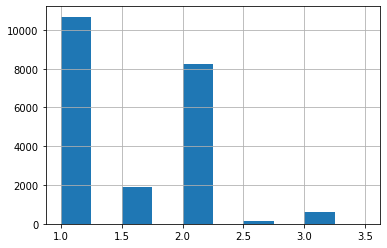

In [8]:
df['floors'].hist()

8. ¿Con que tipo de distribución relacionaría el precio de las propiedades cuyo valor es menor o igual a 2000000 dentro del dataset Demuéstralo con un histograma.

    Se filtraron los datos de las propiedades con valor igual o menor a 2000000 dólares y despues se graficaron con un histograma utilizando el método hist().
    
    Analizando el comportamiento del histograma, se puede observar que la gráfica presenta un comportamiento similar al presentado por la función de densidad de una distribución normal logarítmica.

<AxesSubplot:>

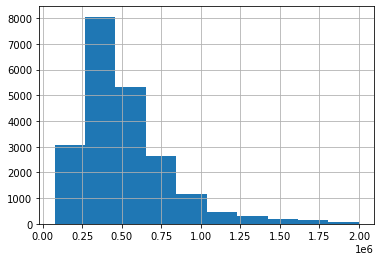

In [9]:
prices2000000 = df[(df['price'] < 2000000)]
prices2000000['price'].hist()

<a name="parte_dos"></a>
<h2 style>Segunda Parte: Machine Learning</h2>

Se importan las librerías necesarias para realizar el análisis de los datos y predicción de resultados futuros.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Despues de importar la librerías se utiliza el método read_csv() para leer el dataset. Se observa que los datos de la columna date son tipo Object por lo que se convierte a String y se extraen los años, meses y días y las nuevas columnas se transforman a tipo Int64.

In [11]:
df = pd.read_csv('kc_house_data.csv')
df['date'] = df['date'].astype('string')
df['year'] = df['date'].str[:4].astype('int64')
df['month'] = df['date'].str[4:6].astype('int64')
df['day'] = df['date'].str[6:8].astype('int64')

El siguiente paso es separar las variables independientes de la variable dependiente, en este caso, el precio de las propiedades. Además se elimina la columna date para no tener inconvenientes.

In [14]:
x = df[['year', 'month', 'day', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

Teniendo los datos separados, se utiliza el método train_test_split() de la librería sklearn para separar los datos utilizados en los entrenamiento y las pruebas. Se optó por separar el 80% de los datos para entrenar el sistema y el 20% restante para realizar las pruebas del sistema.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 0)

Con el set de datos de entrenamiento se realiza el ajuste de una regresión lineal múltiple con los métodos LinearRegression() y fit()

In [17]:
regresion = LinearRegression()

regresion.fit(x_train, y_train)

LinearRegression()

Finalmente se realiza la predicción utilizando el set de datos de prueba de las variables independientes y se calcula el r2 para observar la compatibilidad de la regresión lineal múltiple con los datos de entrada.

In [19]:
y_prediccion = regresion.predict(x_test)

r2 = r2_score(y_test,y_prediccion)

print('El coeficiente r2 es:', r2)

El coeficiente r2 es: 0.6963388348526626


<a name="parte_tres"></a>
<h2 style>Tercera Parte: Capacidades en SQL</h2>

Inicialmente se realizó un diagrama de entidad/relación para observar la estructura de la base de datos con el fin de tener ayuda gráfica para la resolución de los problemas. El resultado se muestra a continuación:

![example1](img/diagramaer.png)

1. Cuales son las categorias de productos que mas han vendido y cuanto han vendido en precio y cantidad.

    Se diseñó una tabla temporal la cual contiene los datos del nombre y el ID de las categorías, la cantidad de productos que se compraron y el precio total calculado con los precios de cada producto y su cantidad vendida, y se agruparon los datos para clasificarlos por productos. Despues de ello se realizó la consulta solicitada, extrayendo de la tabla temporal el nombre de la categoría, la sumatoria de la cantidad de productos y el precio total agrupando los datos por categorías. 
    
    A continuación, se muestra la consulta realizada junto con el resultado obtenido.

In [ ]:
SELECT temp.NombreCategoria, SUM(temp.Cantidad) CantidadTotal, SUM(temp.PrecioTotal) TotalPrecio FROM 
	
    (SELECT Categories.CategoryName NombreCategoria, Categories.CategoryID IDCategoria, OrderDetails.Quantity Cantidad,     OrderDetails.Quantity*Products.Price PrecioTotal 
	
    FROM OrderDetails JOIN Products JOIN Categories ON OrderDetails.ProductID = Products.ProductID and Products.CategoryID = Categories.CategoryID 
	
    GROUP BY products.productID) temp 

GROUP BY temp.IDCategoria 

ORDER BY TotalPrecio DESC

![example2](img/sql1.PNG)

2. Cuantas unidades y dinero de cada producto ha vendido cada empleado

    Se realizó la consulta solicitando el apellido y el nombre de los empleados, el nombre y el precio de los productos, la cantidad solicitada en los detalles de ordenes de compra y se calculó el precio total. Se agruparon los datos por el ID de los productos y de los empleados, y para mejor visibilidad se ordenaron en orden ascendente de los ID de empleados y por orden descendente de las cantidades totales. 

    A continuación, se muestra la consulta realizada junto con una parte del resultado obtenido por limitaciones de la herramienta de recortes.

In [ ]:
SELECT Employees.LastName Apellido, Employees.FirstName Nombre, Products.ProductName NombreProducto, SUM(OrderDetails.Quantity) Cantidad, Products.Price Precio, Products.Price*SUM(OrderDetails.Quantity) TotalPrecio 

FROM OrderDetails JOIN Products JOIN Orders JOIN Employees ON OrderDetails.ProductID = Products.ProductID and OrderDetails.OrderID = Orders.OrderID and Orders.EmployeeID = Employees.EmployeeID 

GROUP BY Products.ProductID, Employees.EmployeeID 

ORDER BY Employees.EmployeeID ASC,  SUM(OrderDetails.Quantity) DESC

![example3](img/sql2.PNG)

3. Cual es el producto más vendido por cada empleado.

    Se diseñó una tabla temporal la cual contiene los datos del nombre, apellido e ID de los empleados, el nombre de los productos y la sumatoria de los productos vendidos. Despues de ello se realizó la consulta solicitada, extrayendo de la tabla temporal el nombre y apellido de los empleados, el nombre del producto más vendido y su correspondiente cantidad. Los datos se agruparon por el número de empleados y se ordenaron por el número de ID de los empleados.
    
    A continuación, se muestra la consulta realizada junto con el resultado obtenido.

In [ ]:
SELECT temp.Apellido, temp.Nombre, temp.NombreProducto, MAX(temp.Cantidad) Cantidad FROM 
	    
    (SELECT Employees.LastName Apellido, Employees.FirstName Nombre, Products.ProductName NombreProducto, SUM(OrderDetails.Quantity) Cantidad, Employees.EmployeeID ID

	FROM OrderDetails JOIN Products JOIN Orders JOIN Employees ON OrderDetails.ProductID = Products.ProductID and OrderDetails.OrderID = Orders.OrderID and Orders.EmployeeID = Employees.EmployeeID 
        
	GROUP BY Products.ProductID, Employees.EmployeeID) temp 
    
GROUP BY temp.ID 
    
ORDER BY temp.ID 

![example4](img/sql3.PNG)